In [1]:
# Import necessary libraries
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Get the image data into a dataframe
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = '../Data/AppleData'
categories = ['Apple___Apple_scab',
              'Apple___Black_rot',
              'Apple___Cedar_apple_rust',
              'Apple___healthy',
              'Background_without_leaves']

for category in categories:
  path= datadir + '/' + category
  for img in os.listdir(path):
    img_matrix=imread(os.path.join(path,img))
    img_resized=resize(img_matrix,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category)

In [3]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [4]:
# Final dataframe after pre-processing
df


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.620925,0.601317,0.690971,0.619820,0.600212,0.689866,0.603029,0.583421,0.673074,0.592236,...,0.480563,0.556364,0.459568,0.449381,0.510516,0.425871,0.534011,0.586077,0.512925,Apple___Apple_scab
1,0.654884,0.541159,0.658806,0.651742,0.538017,0.655664,0.647593,0.533867,0.651514,0.647059,...,0.168475,0.282617,0.061377,0.193551,0.301337,0.086578,0.227818,0.333705,0.126966,Apple___Apple_scab
2,0.588042,0.580198,0.725297,0.583417,0.575574,0.720672,0.569727,0.561884,0.706982,0.565226,...,0.182223,0.292027,0.131242,0.192194,0.301998,0.141214,0.203296,0.313100,0.152316,Apple___Apple_scab
3,0.397645,0.328257,0.445352,0.386719,0.314680,0.449144,0.404865,0.328702,0.481765,0.410827,...,0.360489,0.321273,0.419313,0.384907,0.345691,0.443730,0.431261,0.392045,0.490084,Apple___Apple_scab
4,0.666605,0.654841,0.768566,0.659068,0.647303,0.761028,0.656207,0.644442,0.758168,0.660914,...,0.699485,0.660269,0.758308,0.652724,0.613509,0.711548,0.648176,0.608961,0.707000,Apple___Apple_scab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,0.976564,0.984978,0.999990,0.982470,0.994179,0.998504,0.986881,0.999062,0.999890,0.926278,...,0.384422,0.505797,0.113010,0.506074,0.597505,0.238084,0.541718,0.598468,0.263142,Background_without_leaves
5784,0.035711,0.043554,0.028889,0.098460,0.106599,0.085807,0.092128,0.103922,0.068450,0.072344,...,0.087520,0.103207,0.038444,0.092310,0.107997,0.049165,0.095822,0.111508,0.052685,Background_without_leaves
5785,0.084513,0.083992,0.047605,0.064008,0.067860,0.044661,0.119620,0.126512,0.106917,0.179521,...,0.140611,0.305317,0.493553,0.136937,0.301643,0.489878,0.130338,0.295043,0.483279,Background_without_leaves
5786,0.246884,0.446187,0.106714,0.243735,0.470418,0.138066,0.213077,0.455380,0.130560,0.208293,...,0.086862,0.163379,0.019472,0.155148,0.262776,0.115088,0.121469,0.224705,0.142823,Background_without_leaves


In [5]:
# Make category dictionary
cat_dict = {'Apple___Apple_scab':'Scabbed',
              'Apple___Black_rot':'Black Rot',
              'Apple___Cedar_apple_rust':'Cedar Rust',
              'Apple___healthy':'Healthy',
              'Background_without_leaves':'Background'}

In [6]:
# Input and Output 
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [8]:
k=np.arange(1,10)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param,verbose=1)
model_grid.fit(x,y)
# Best K nearest neighbor
model_grid.best_params_
     


Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'n_neighbors': np.int64(1)}

In [19]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.729550,0.171712,2.830329,0.202811,1,{'n_neighbors': 1},0.729706,0.735751,0.702073,0.726016,0.720830,0.722875,0.011483,1
1,3.507997,0.114227,2.718891,0.095220,2,{'n_neighbors': 2},0.706390,0.708117,0.687392,0.702679,0.710458,0.703007,0.008210,2
2,3.610766,0.145871,2.763511,0.127434,3,{'n_neighbors': 3},0.704663,0.711572,0.687392,0.692308,0.717373,0.702661,0.011315,3
3,3.440902,0.036670,2.706740,0.073101,4,{'n_neighbors': 4},0.695164,0.698618,0.663212,0.678479,0.698358,0.686766,0.013920,4
4,3.501933,0.138513,2.716895,0.046710,5,{'n_neighbors': 5},0.689983,0.683938,0.646805,0.671564,0.696629,0.677784,0.017551,6
5,3.533808,0.098235,2.756477,0.086617,6,{'n_neighbors': 6},0.685665,0.684801,0.655440,0.671564,0.692308,0.677956,0.013115,5
6,3.564402,0.063025,2.728379,0.053468,7,{'n_neighbors': 7},0.677029,0.679620,0.659758,0.663786,0.689715,0.673982,0.010908,7
7,3.464356,0.032261,2.673455,0.047823,8,{'n_neighbors': 8},0.664940,0.672712,0.642487,0.659464,0.676750,0.663271,0.012001,8
8,3.494368,0.059136,2.711232,0.070987,9,{'n_neighbors': 9},0.657168,0.666667,0.643351,0.656007,0.675022,0.659643,0.010683,9


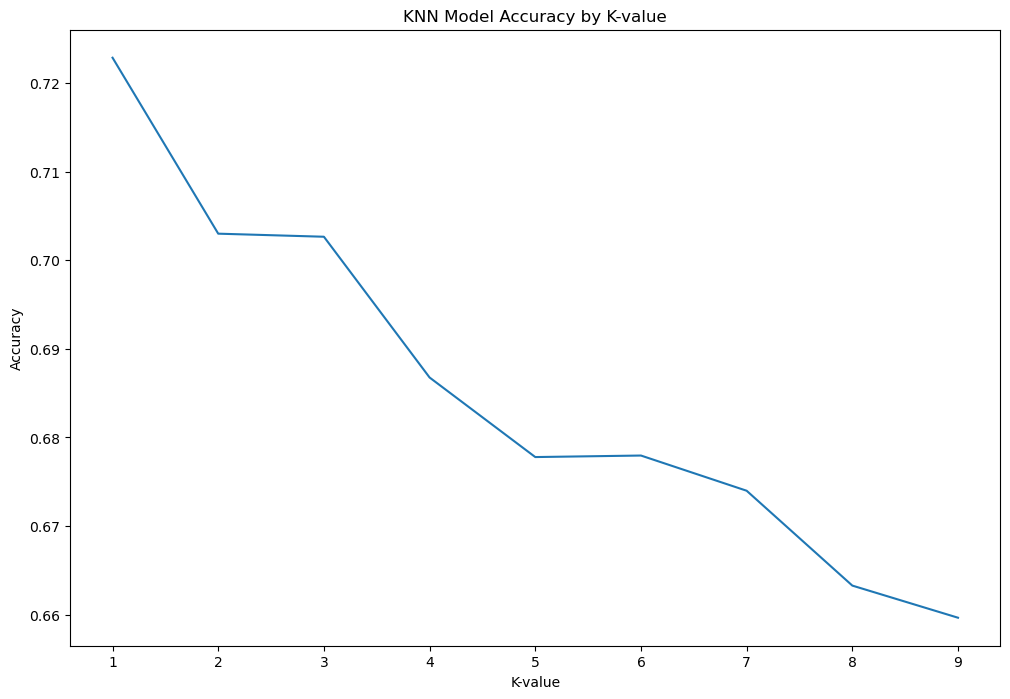

In [24]:
results = pd.DataFrame(model_grid.cv_results_)
plt.figure(figsize=(12,8))
plt.plot(results["param_n_neighbors"], results["mean_test_score"])
plt.title('KNN Model Accuracy by K-value')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.savefig("../Output/KNN_Accuracy.png")

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

for kval in np.arange(1,51):
    print(str(kval) + " Nearest Neighbors:")
    model = KNeighborsClassifier(n_neighbors=kval,metric='euclidean')
    model.fit(x_train,y_train)
    # Predicted Output
    y_pred = model.predict(x_test)
    print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")
    cm=confusion_matrix(y_pred,y_test)
    print(cm)
    print(metrics.classification_report(y_test,y_pred))

1 Nearest Neighbors:
The accuracy of the model is  73.18590186592951 %
[[149  10   2  27  15]
 [  0 113   1   2   0]
 [ 72  81 244  31  44]
 [ 24  43   5 360  21]
 [  5   0   2   3 193]]
                           precision    recall  f1-score   support

       Apple___Apple_scab       0.73      0.60      0.66       250
        Apple___Black_rot       0.97      0.46      0.62       247
 Apple___Cedar_apple_rust       0.52      0.96      0.67       254
          Apple___healthy       0.79      0.85      0.82       423
Background_without_leaves       0.95      0.71      0.81       273

                 accuracy                           0.73      1447
                macro avg       0.79      0.71      0.72      1447
             weighted avg       0.80      0.73      0.73      1447

2 Nearest Neighbors:
The accuracy of the model is  71.11264685556323 %
[[177  18   7  43  31]
 [  0 135   1   6   0]
 [ 63  73 245  63  64]
 [ 10  21   1 311  17]
 [  0   0   0   0 161]]
                    

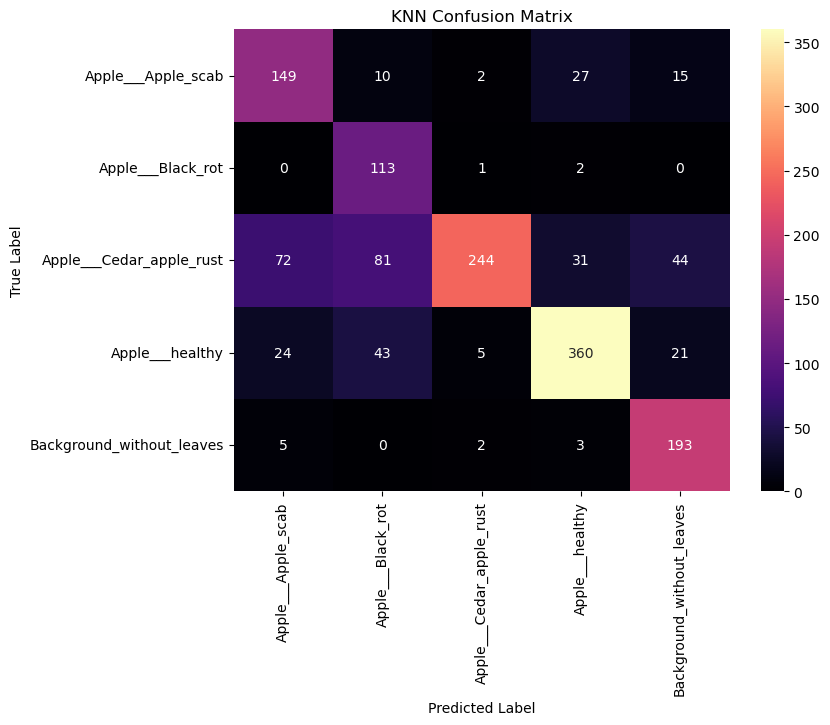

In [27]:
model = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm=confusion_matrix(y_pred,y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma",
            xticklabels=categories,
            yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.savefig("../Output/KNN_Confusion_Matrix.png")